# Hierarchical Clustering

Hierarchical clustering, also referred to as hierarchical cluster analysis (HCA) is a common algorithm used to group data points with similar attributes. It is able to cluster data using two approaches: agglomerative (bottom-up) and divisive (top-down), shown below.

![fig1](../img/hca.png)

For the purpose of this notebook we will focus on the agglomerative approach. This method treats all data points as individual clusters initially. Larger clusters are then built by calculating the distance between each data point, merging the two closest each time until the desired number of clusters have been achieved.

The kdb+/q implementation of HCA uses euclidean distance metrics and centroid linkage methods to find clusters within data. Additionally, a kd-tree has been used to store the data points, their respective distances and their relative positions in the tree-structure.

### Requirements

The technical dependencies required to run this notebook are as follows:

    - embedPy
    - Matplotlib 2.1.1

### Load HCA

Below loads in the HCA algorithm defined in `hca.q`. The script `kdtree.q` is also used, called within the HCA script. EmbedPy has also been used below to import `matplotlib.pyplot` to visualise the data and resulting clusters.

In [1]:
\l clust.q

plt:.p.import`matplotlib.pyplot

### Example 1

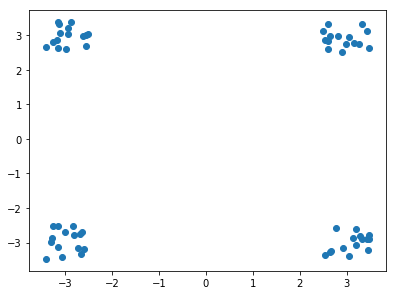

In [2]:
d1:(60#"F";",")0:`:../data/ss5.csv
plt[`:scatter][;]. flip d1;
plt[`:show][];

4 13584


0 | 3.487966 2.617258   3.052439 2.939565   2.541804 2.855116   2.993872 2.74..
15| 3.468053 -3.205529  3.473971 -2.881551  2.915968 -3.146783  3.287449 -2.8..
30| -3.419303 -3.460712 -2.66534  -3.327664 -2.843735 -2.520843 -3.256643 -2...
45| -2.946691 3.19919   -3.408824 2.648383  -3.148617 3.378614  -2.563794 2.7..


0 | {[f;x]embedPy[f;x]}[foreign]enlist
15| {[f;x]embedPy[f;x]}[foreign]enlist
30| {[f;x]embedPy[f;x]}[foreign]enlist
45| {[f;x]embedPy[f;x]}[foreign]enlist


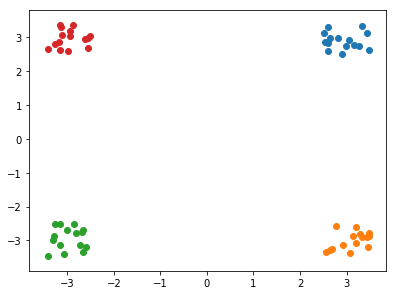

In [8]:
\l clust.q
\ts r1:.clust.hc[d1;4;`edist;`ward]
d1 exec ind by clt from r1 
{plt[`:scatter][;]. flip x}each d1 exec ind by clt from r1 
plt[`:show][];

### Example 2

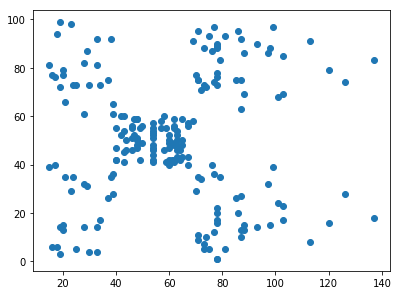

In [9]:
d2:("SSFFF";(),",")0:`:../data/cust.csv
d2:flip d2`Income`SpendingScore
plt[`:scatter][;]. flip d2;
plt[`:show][];

In [9]:
\l clust.q
\ts r2:.clust.hc[d2;5;`edist;`ward]
r2
{plt[`:scatter][;]. flip x}each r2;
plt[`:show][];

36 43296


ind rep               clt nni nnd    
-------------------------------------
0   48.07843 43.60784 0   1   43.0823
1   25.09524 80.04762 1   0   43.0823
2   48.07843 43.60784 0   1   43.0823
3   25.09524 80.04762 1   0   43.0823
4   48.07843 43.60784 0   1   43.0823
5   25.09524 80.04762 1   0   43.0823
6   48.07843 43.60784 0   1   43.0823
7   25.09524 80.04762 1   0   43.0823
8   48.07843 43.60784 0   1   43.0823
9   25.09524 80.04762 1   0   43.0823
10  48.07843 43.60784 0   1   43.0823
11  25.09524 80.04762 1   0   43.0823
12  48.07843 43.60784 0   1   43.0823
13  25.09524 80.04762 1   0   43.0823
14  48.07843 43.60784 0   1   43.0823
15  25.09524 80.04762 1   0   43.0823
16  48.07843 43.60784 0   1   43.0823
17  25.09524 80.04762 1   0   43.0823
18  48.07843 43.60784 0   1   43.0823
19  25.09524 80.04762 1   0   43.0823
..


[0;31mcall: float() argument must be a string or a number, not 'dict'[0m: [0;31mcall: float() argument must be a string or a number, not 'dict'[0m

### Example 3

In [ ]:
datapts:1000
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
data :flip(-5 1)+(1 1.5)*dsc[1000; 0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
data,:flip(4 -1)+(1 8)*dsc[4000; 0;1.]
data@:neg[datapts&count data]?count data
d3:data
plt[`:scatter][;]. flip d3;
plt[`:show][];

In [ ]:
\ts r3:.clust.hc[d3;4;.clust.edist2;`single]
{plt[`:scatter][;]. flip x}each r3;
plt[`:show][];

### Example 4

In [ ]:
fcps:.p.import[`pyclustering.samples.definitions]`:FCPS_SAMPLES
read:.p.import[`pyclustering.utils]`:read_sample
d4:read[fcps`:SAMPLE_TARGET]`
plt[`:scatter][;]. flip d4;
plt[`:show][];

In [ ]:
\ts r4:.clust.hc[d4;6;.clust.edist2;`single]
{plt[`:scatter][;]. flip x}each r4;
plt[`:show][];

### Example 5 - 3D

In [ ]:
d5:read[fcps`:SAMPLE_CHAINLINK]`
.p.import[`mpl_toolkits.mplot3d]`:Axes3D;
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][;;]. flip d5;
plt[`:show][];

In [ ]:
\ts r5:.clust.hc[d5;2;.clust.edist2;`single]
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
{ax[`:scatter][;;]. flip x}each r5;
plt[`:show][];